In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l 

# 1.Synthetic Data

In [3]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X , y.reshape((-1,1))

In [4]:
true_w = torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [5]:
print("features:",features[0],"\nlabel:",labels[0])

features: tensor([ 2.0313, -0.3706]) 
label: tensor([9.5191])


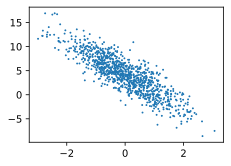

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),s=1);

# 2.Reading the Dataset&Split the Dataset into Minibatches

In [7]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [8]:
batch_size=10

for X,y in data_iter(batch_size,features,labels):
    print(X.shape,"\n",y.shape)
    break

torch.Size([10, 2]) 
 torch.Size([10, 1])


# 3.Initializing Model Parameters

In [9]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

# 4.Defining the Model

In [10]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

# 5.Defining the Loss Function

In [11]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 6.Deifning the Optimization Algorithm

In [12]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# 7.Training

In [13]:
lr=0.03
num_epochs=100
net=linreg
loss=squared_loss

In [14]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.037116
epoch 2,loss 0.000137
epoch 3,loss 0.000049
epoch 4,loss 0.000049
epoch 5,loss 0.000049
epoch 6,loss 0.000049
epoch 7,loss 0.000049
epoch 8,loss 0.000049
epoch 9,loss 0.000049
epoch 10,loss 0.000049
epoch 11,loss 0.000049
epoch 12,loss 0.000049
epoch 13,loss 0.000049
epoch 14,loss 0.000049
epoch 15,loss 0.000049
epoch 16,loss 0.000049
epoch 17,loss 0.000049
epoch 18,loss 0.000049
epoch 19,loss 0.000049
epoch 20,loss 0.000049
epoch 21,loss 0.000049
epoch 22,loss 0.000049
epoch 23,loss 0.000049
epoch 24,loss 0.000049
epoch 25,loss 0.000049
epoch 26,loss 0.000049
epoch 27,loss 0.000049
epoch 28,loss 0.000049
epoch 29,loss 0.000049
epoch 30,loss 0.000050
epoch 31,loss 0.000049
epoch 32,loss 0.000049
epoch 33,loss 0.000049
epoch 34,loss 0.000049
epoch 35,loss 0.000049
epoch 36,loss 0.000049
epoch 37,loss 0.000049
epoch 38,loss 0.000049
epoch 39,loss 0.000049
epoch 40,loss 0.000049
epoch 41,loss 0.000049
epoch 42,loss 0.000049
epoch 43,loss 0.000049
epoch 44,loss 0.0000

In [15]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b-b}')

error in estimating w: tensor([-0.0008,  0.0003], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)
